In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [1]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                 random_state=0, cluster_std=0.6)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=50, edgecolors="k", lw=.4)

NameError: name 'plt' is not defined

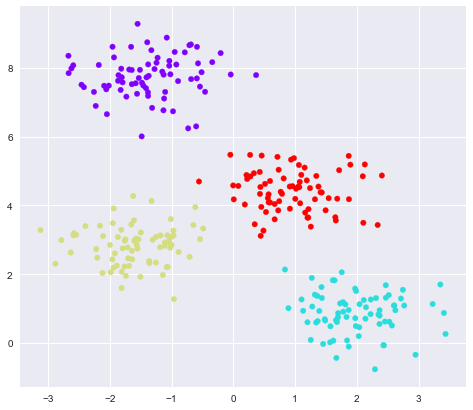

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(4)
model.fit(X)
y_pred = model.predict(X)
plt.figure(figsize=(8,7))
plt.scatter(X[:,0], X[:,1], c=y_pred, s=30, cmap="rainbow")

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
model = KMeans(n_clusters=10)
clusters = model.fit_predict(X)
model.cluster_centers_.shape
clusters.shape

(1797,)

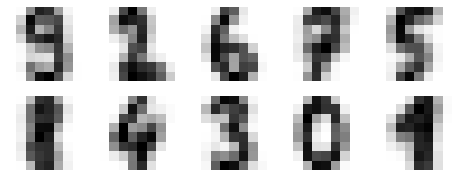

In [37]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(model.cluster_centers_[i].reshape(8,8),cmap="binary")
    ax.set_xticks([])
    ax.set_yticks([])

In [55]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]


Text(0.5,1,'true values')

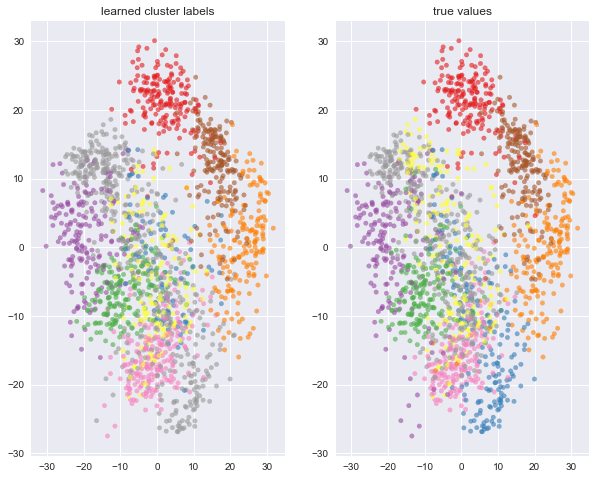

In [72]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap="Set1", alpha=.6)

fig, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].scatter(X[:,0], X[:,1], s=20, c=labels,  **kwargs)
ax[0].set_title("learned cluster labels")
ax[1].scatter(X[:,0],X[:,1], s=20,c=digits.target, **kwargs)
ax[1].set_title("true values")

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.79298831385642743